In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_parquet(r'C:\Users\kumra\OneDrive\Desktop\Data Mining\Project 2023\202304.parquet')
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only
0,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,None,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
1,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,None,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
2,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,None,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
3,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,None,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
4,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000,1995-03-10 00:00,S65 1QJ,T,N,L,22,None,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A


In [3]:
df.shape

(28276227, 16)

In [4]:
df.describe()

,price
count,2.827623e+07
mean,2.181305e+05
std,8.688525e+05
min,1.000000e+00
25%,8.495000e+04
50%,1.499500e+05
75%,2.475000e+05
max,5.943000e+08


In [5]:
df.price.min()

1

In [6]:
df.price.max()

594300000

In [7]:
df.price.describe()

count    2.827623e+07
mean     2.181305e+05
std      8.688525e+05
min      1.000000e+00
25%      8.495000e+04
50%      1.499500e+05
75%      2.475000e+05
max      5.943000e+08
Name: price, dtype: float64

In [8]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price
count,28276227.00
mean,218130.50
std,868852.46
min,1.00
25%,84950.00
50%,149950.00
75%,247500.00
max,594300000.00


In [9]:
df.price[round(df.price)==1].shape

(9,)

In [10]:
df.drop(df.index[(round(df.price)==1)],inplace=True)#.price.describe()#.apply(lambda s: s.apply('{0:.2f}'.format))
df.shape

(28276218, 16)

In [11]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price
count,28276218.00
mean,218130.56
std,868852.59
min,49.00
25%,84950.00
50%,149950.00
75%,247500.00
max,594300000.00


In [12]:
df.Date_of_Transfer = pd.to_datetime(df.Date_of_Transfer)
df['year'] = df.Date_of_Transfer.dt.year
df.columns

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year'],
      dtype='object')

<Axes: xlabel='year', ylabel='price'>

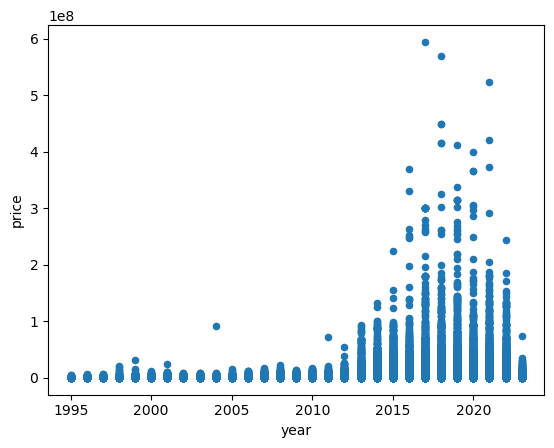

In [13]:
df.plot(y = 'price',x='year',kind='scatter')

In [14]:
df.price[round(df.price)<=1000].shape

(9859,)

In [15]:
df.price[round(df.price)>=10000000].shape

(10352,)

In [16]:
df.price[~((round(df.price)<=10000)|(round(df.price)>=10000000))].shape

(28195966,)

In [17]:
df.price[((round(df.price)<=10000)|(round(df.price)>=10000000))].mean()

3594445.621915965

In [18]:
df.price.mean()

218130.564765875

In [19]:
df.price[~((round(df.price)<=10000)|(round(df.price)>=10000000))].mean()

208520.8200255668

In [20]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'mean'})

,price
year,
1995,68336.267859
1996,71923.786623
1997,78900.077698
1998,85600.953177
1999,96246.399423
2000,107768.774617
2001,119150.624796
2002,138220.464606
2003,156031.008289


<Axes: xlabel='year'>

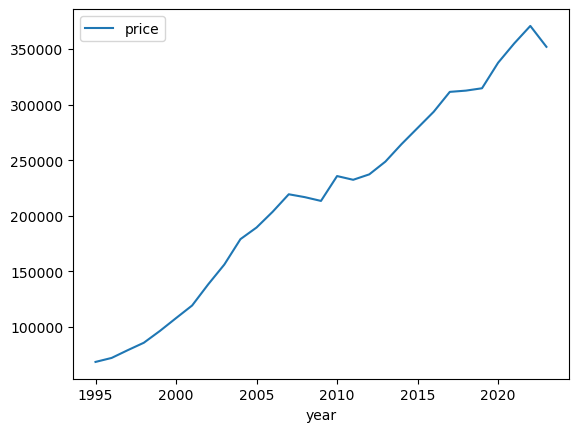

In [21]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'mean'}).plot(kind='line')

In [22]:
print(df[((round(df.price)>=5000)&(round(df.price)<80000))].shape) # Base low
print(df[((round(df.price)>=80000)&(round(df.price)<150000))].shape) # Low
print(df[((round(df.price)>=150000)&(round(df.price)<300000))].shape) # Moderate
print(df[((round(df.price)>=300000)&(round(df.price)<=10000000))].shape) # High

(6474632, 17)
(7688632, 17)
(9092500, 17)
(4986399, 17)


In [23]:
print(6474632/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))])) # 
print(7688632/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))
print(9092500/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))
print(4986399/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))

0.22929627364409141
0.27228955514702885
0.3220069292137223
0.17659114982946117


In [24]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'min'})

,price
year,
1995,10001
1996,10025
1997,10001
1998,10025
1999,10001
2000,10001
2001,10030
2002,10001
2003,10080


In [27]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year
0,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03,SR6 0AQ,T,N,F,50,None,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A,1995
1,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13,CO6 1SQ,T,N,F,19,None,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A,1995
2,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28,B90 4TG,T,N,F,37,None,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A,1995
3,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28,DY5 1SA,S,N,F,59,None,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A,1995
4,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000,1995-03-10,S65 1QJ,T,N,L,22,None,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A,1995


In [28]:
df.loc[df.index[((round(df.price)>=5000)&(round(df.price)<80000))],'Flag']= 'Base'
df.loc[ddff.index[((round(df.price)>=80000)&(round(df.price)<150000))],'Flag']= 'Low' # Low
df.loc[df.index[((round(df.price)>=150000)&(round(df.price)<300000))],'Flag']= 'Moderate' # Moderate
df.loc[df.index[((round(df.price)>=300000)&(round(df.price)<=10000000))],'Flag']= 'High' # High

In [30]:
df.Flag.value_counts(dropna=False)

Moderate    9092500
Low         7688632
Base        6474632
High        4986399
NaN           34055
Name: Flag, dtype: int64

In [31]:
df[df.Flag.isnull()].head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Flag
249,{2A289E9F-91C4-CDC8-E050-A8C063054829},1700,1995-01-10,CT6 6BP,T,N,F,16,None,TYNDALE PARK,None,HERNE BAY,CANTERBURY,KENT,A,A,1995,NaN
280,{2A289E9F-A531-CDC8-E050-A8C063054829},4000,1995-12-12,GL50 4JU,T,N,F,11,None,WELLINGTON SQUARE,None,CHELTENHAM,CHELTENHAM,GLOUCESTERSHIRE,A,A,1995,NaN
634,{2A289E9F-CA36-CDC8-E050-A8C063054829},800,1995-12-29,W5 3NY,S,N,F,28,None,WOODGRANGE AVENUE,None,LONDON,EALING,GREATER LONDON,A,A,1995,NaN
657,{2A289E9F-DC99-CDC8-E050-A8C063054829},2750,1995-12-20,IG3 8XB,F,N,F,6,None,EASTWOOD ROAD,None,ILFORD,REDBRIDGE,GREATER LONDON,A,A,1995,NaN
662,{2A289E9F-DCD5-CDC8-E050-A8C063054829},800,1995-10-20,L12 0JX,T,N,F,26,None,CROMPTON DRIVE,None,LIVERPOOL,LIVERPOOL,MERSEYSIDE,A,A,1995,NaN


In [32]:
print(df.shape)
dfwithoutNaN = df.dropna(subset=['Flag'])
print(dfwithoutNaN.shape)

(28276218, 18)
(28242163, 18)


In [34]:
dfwithoutNaN.Flag.value_counts(dropna=False)

Moderate    9092500
Low         7688632
Base        6474632
High        4986399
Name: Flag, dtype: int64

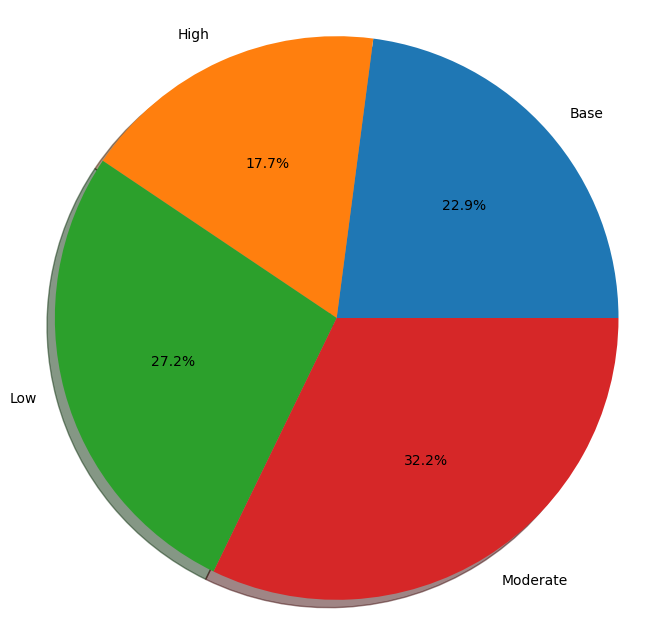

In [39]:

labels = df['Flag']. astype('category').cat.categories. tolist()
counts = df['Flag']. value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()